In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Wed Apr  5 13:59:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [3]:
%cd gdrive/My\ Drive/Hands on Code/Deteksi/yolov3master/
!ls

/content/gdrive/My Drive/Hands on Code/Deteksi/yolov3master
checkpoints		  evaluate_mAP.py    __pycache__
Collect_training_data.py  IMAGES	     README.md
data			  LICENSE	     requirements.txt
deep_sort		  log		     tools
detection_custom.py	  mnist		     train.py
detection_demo.py	  model_data	     yolov3
detect_mnist.py		  object_tracker.py  YOLOv3_colab_training.ipynb


**Install all required libraries for our project:**

In [4]:
!pip install -r ./requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Download yolov3.weights if you don't have it:**

In [5]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2023-04-05 13:59:28--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights.4’

yolov3.weights.4    100%[===================>] 236.52M  33.5MB/s    in 7.0s    

2023-04-05 13:59:36 (33.6 MB/s) - ‘model_data/yolov3.weights.4’ saved [248007048/248007048]



**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [6]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.12.0


'/device:GPU:0'

**Test by loading trained model:**

In [7]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

1/1 [==============================] - 9s 9s/step


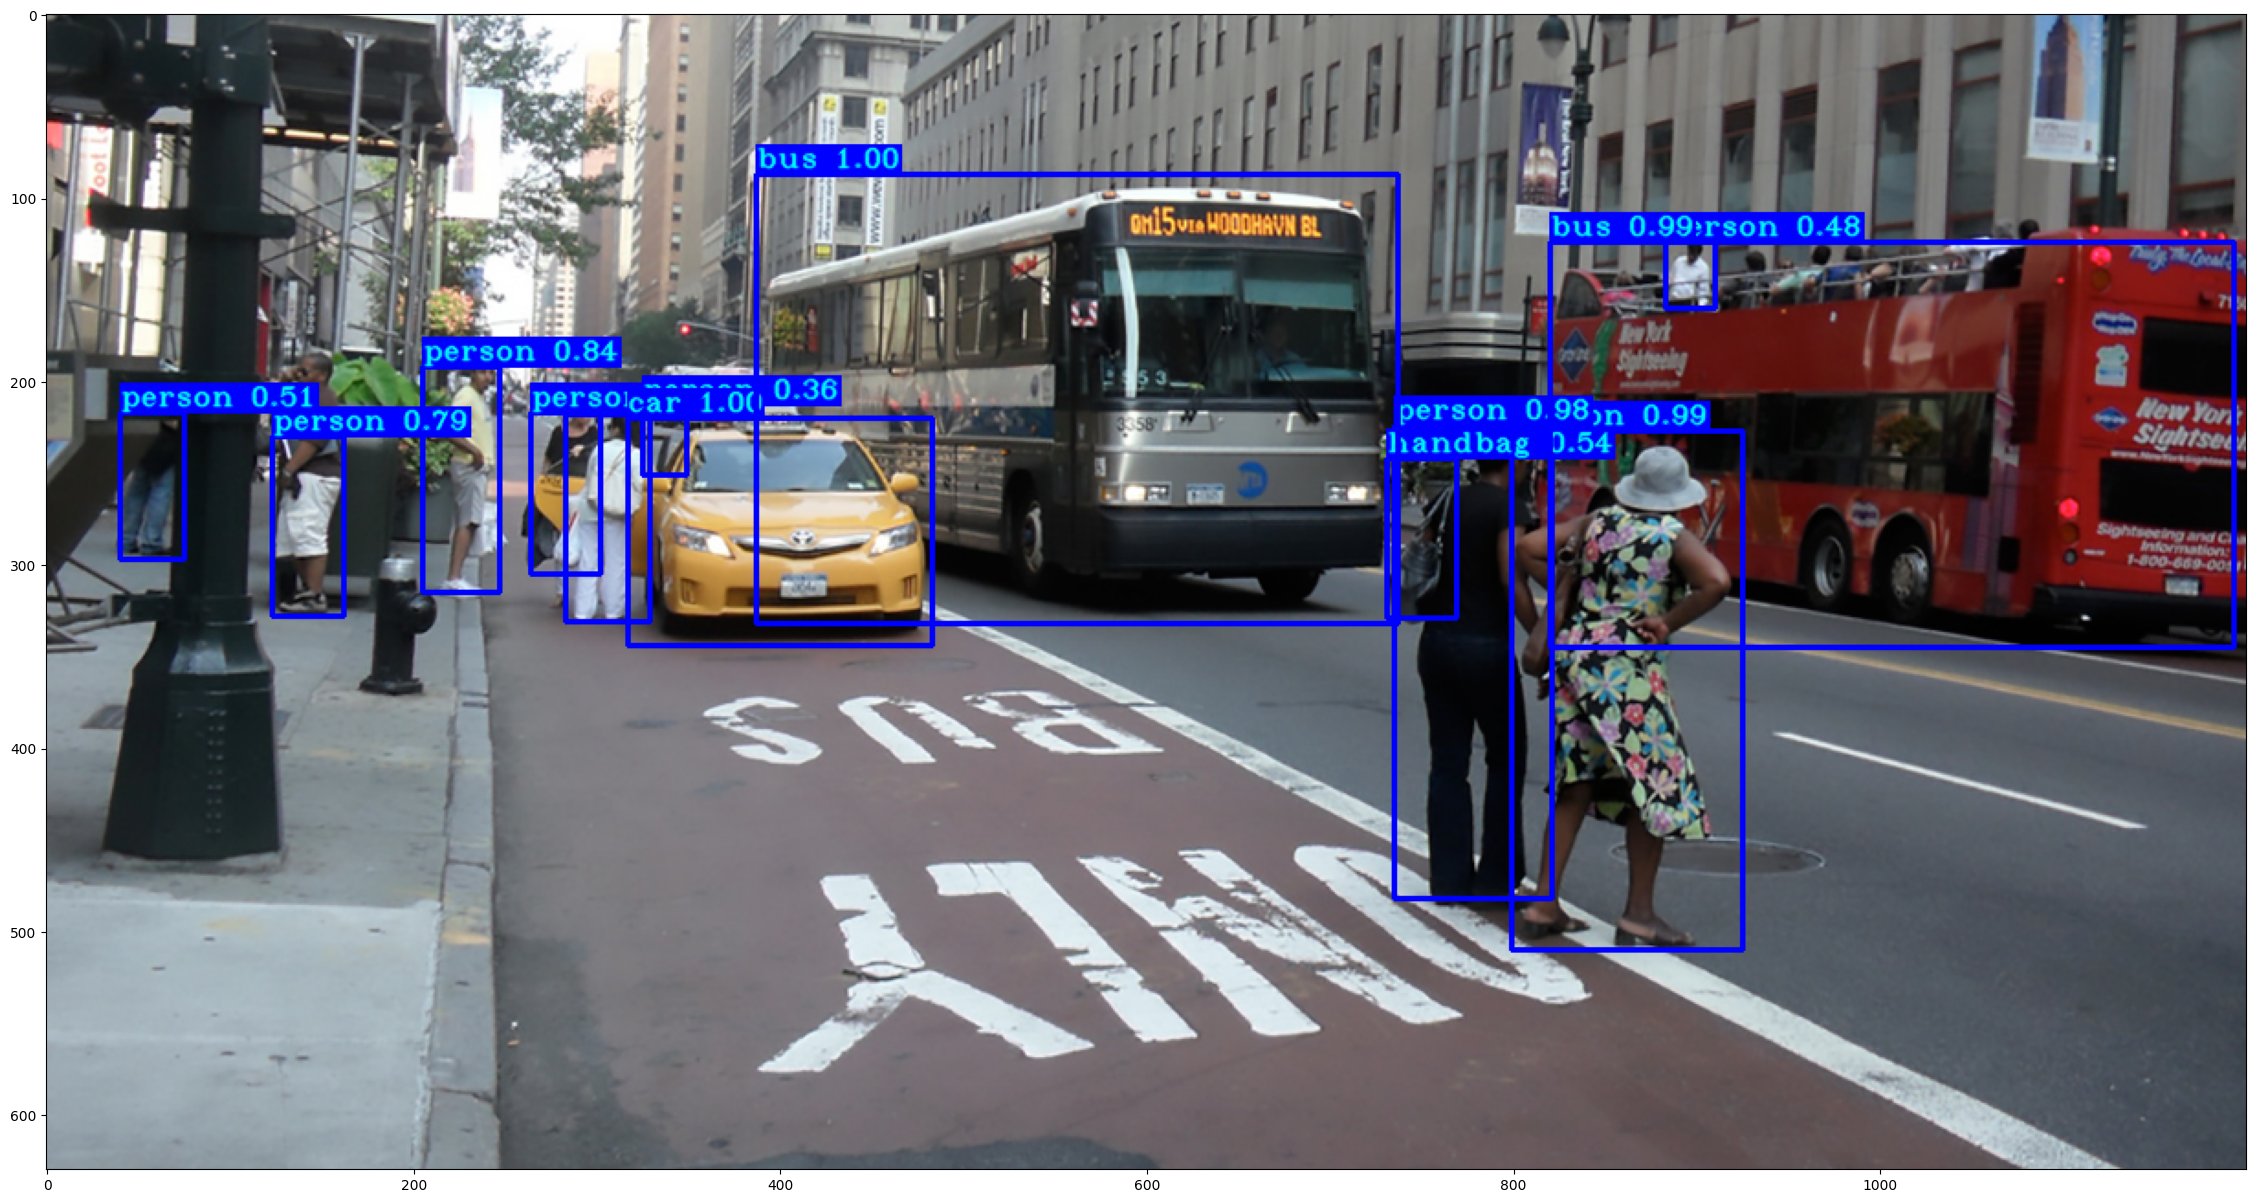

In [8]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [9]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train
/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/031_HC.jpg 274,202,554,521,0
/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/029_HC.jpg 135,124,488,516,0
/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/033_2HC.jpg 295,127,562,402,0
/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/037_HC.jpg 216,81,484,376,0
/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/035_HC.jpg 338,130,612,432,0
/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/039_HC.jpg 268,72,658,425,0
/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/033_HC.jpg 184,124,478,361,0
/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/036_HC.jpg 157,134,478,406,0
/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/034_HC.jpg 220,101,

**Start training custom model:**

In [10]:
from train import *
tf.keras.backend.clear_session()
main()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7982866128308579754
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14343274496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 903138877464527396
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
RuntimeError in tf.config.experimental.list_physical_devices('GPU')
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
skipping conv2d_74
skipping conv2d_66
skipping conv2d_58


epoch: 0 step:    2/20, lr:0.000005, giou_loss:   1.61, conf_loss:2288.96, prob_loss:   1.39, total_loss:2291.97
epoch: 0 step:    3/20, lr:0.000007, giou_loss:   2.02, conf_loss:1664.53, prob_loss:   1.62, total_loss:1668.18
epoch: 0 step:    4/20, lr:0.000010, giou_loss:   2.35, conf_loss:1654.00, prob_loss:   1.65, total_loss:1658.00
epoch: 0 step:    5/20, lr:0.000012, giou_loss:   1.12, conf_loss:1646.78, prob_loss:   1.23, total_loss:1649.13
epoch: 0 step:    6/20, lr:0.000015, giou_loss:   1.37, conf_loss:1632.16, prob_loss:   1.24, total_loss:1634.77
epoch: 0 step:    7/20, lr:0.000018, giou_loss:   2.08, conf_loss:1613.42, prob_loss:   1.38, total_loss:1616.88
epoch: 0 step:    8/20, lr:0.000020, giou_loss:   2.07, conf_loss:1591.33, prob_loss:   1.49, total_loss:1594.89
epoch: 0 step:    9/20, lr:0.000023, giou_loss:   1.57, conf_loss:1573.13, prob_loss:   1.30, total_loss:1576.00
epoch: 0 step:   10/20, lr:0.000025, giou_loss:   1.67, conf_loss:1550.26, prob_loss:   1.20, to

**Create Yolo v3 custom model and load custom trained weights**

In [11]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

1/1 [==============================] - 2s 2s/step


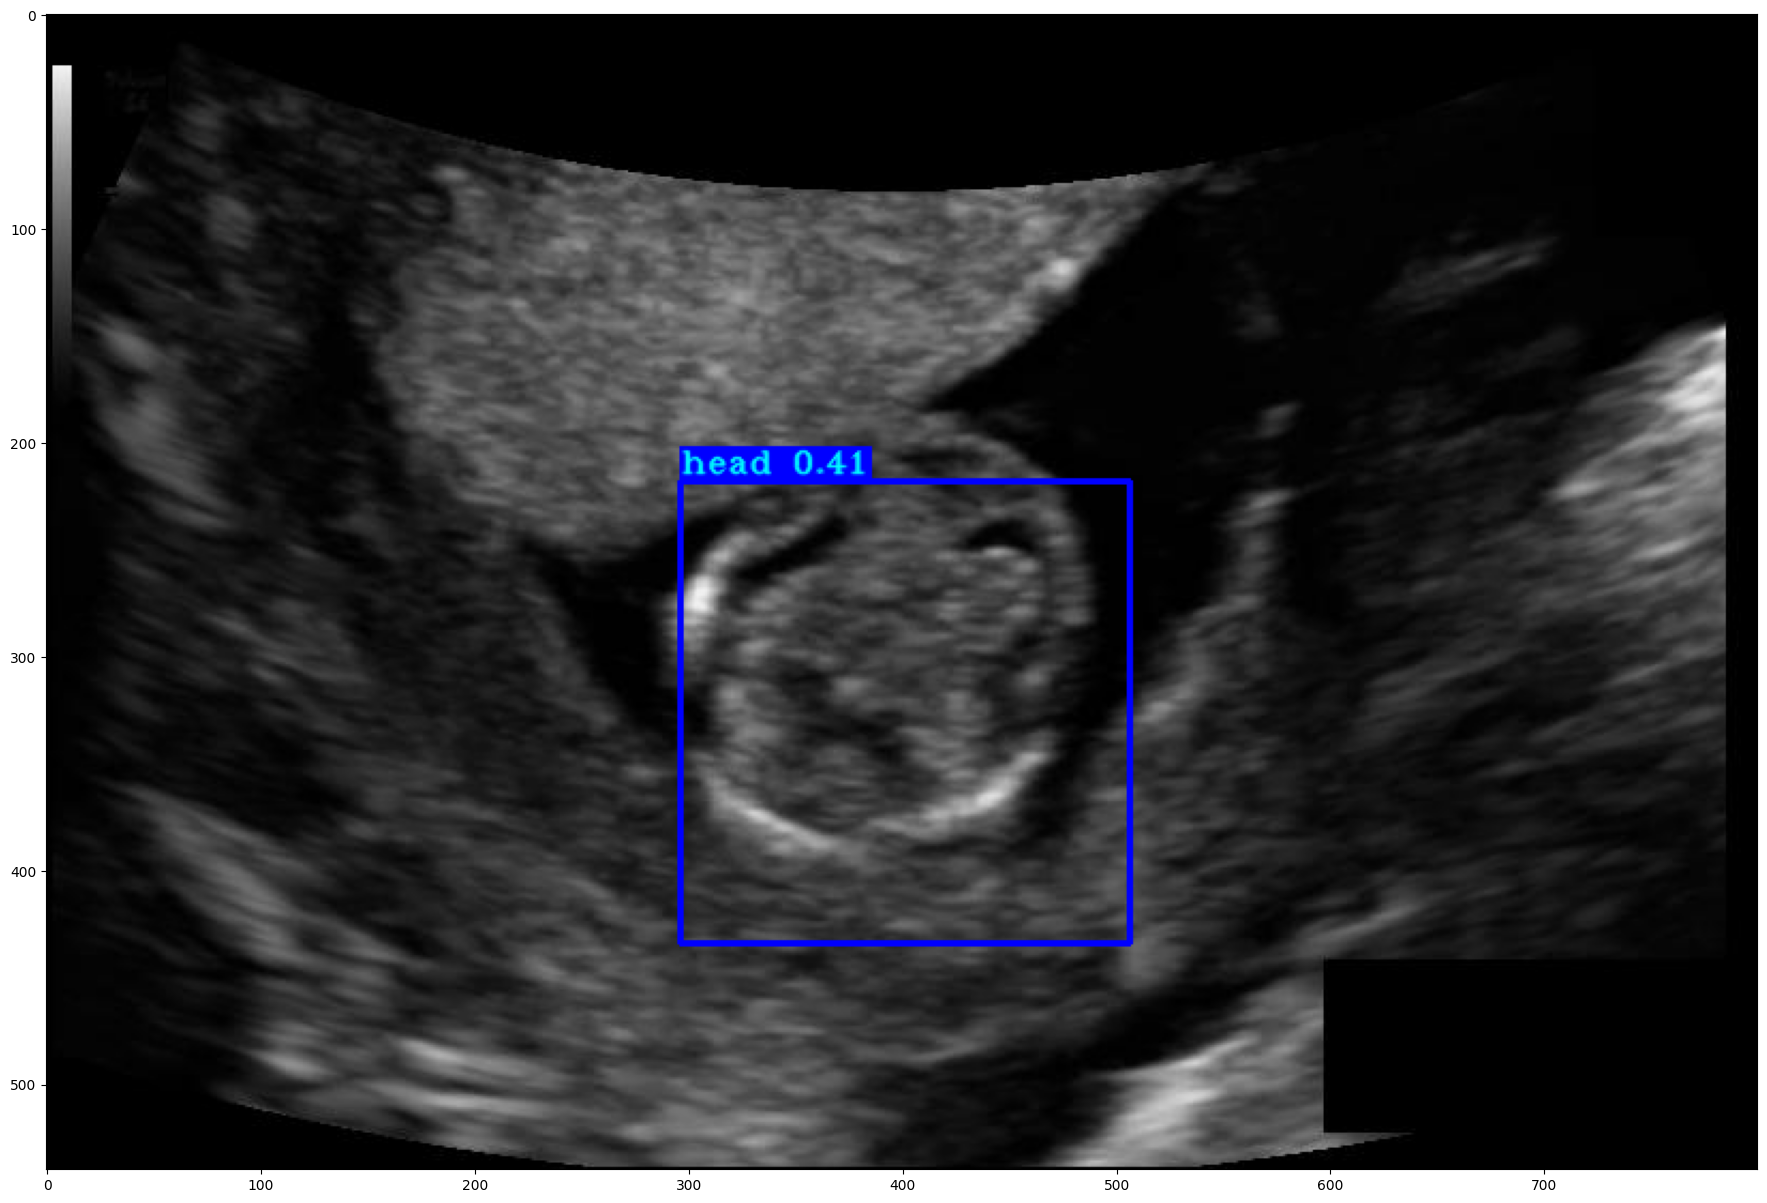

In [12]:
image_path   = "/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/val/019_2HC.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

1/1 [==============================] - 0s 151ms/step


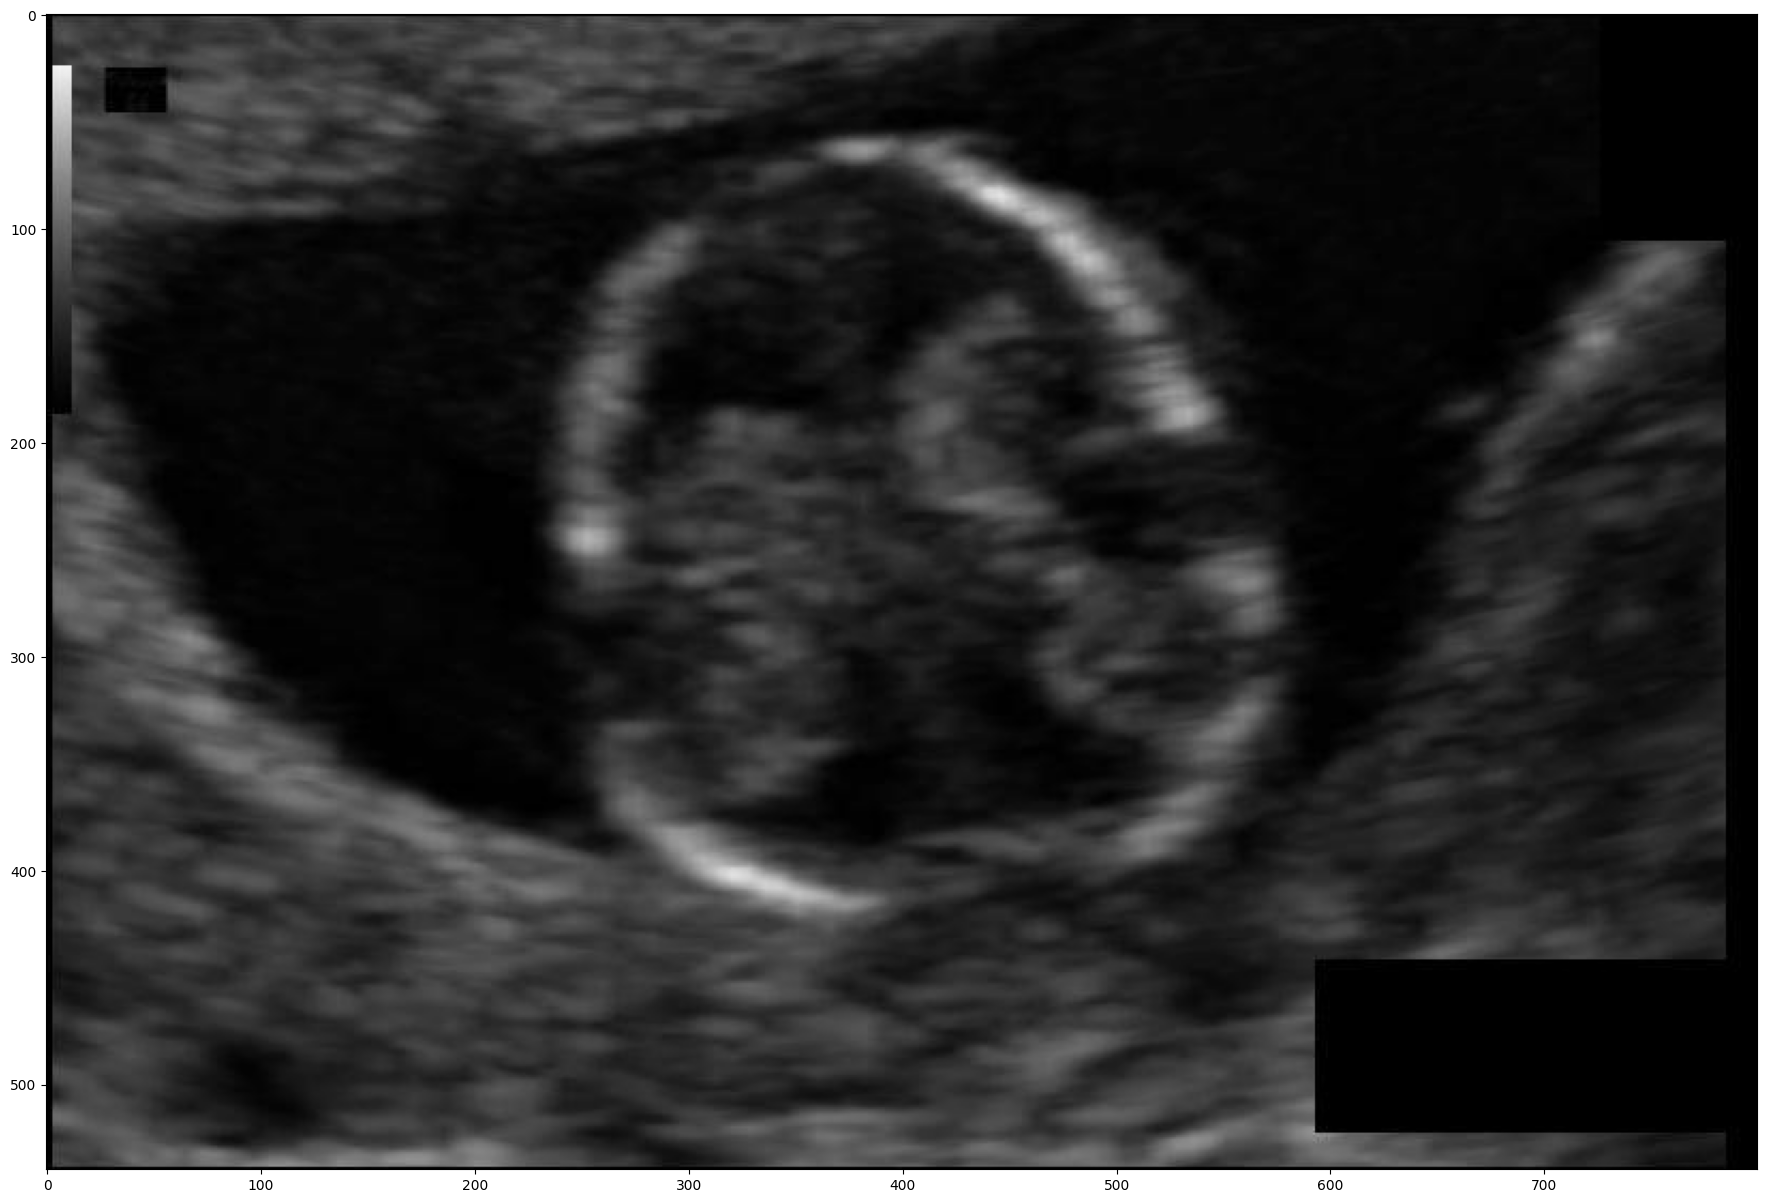

In [14]:
image_path   = "/content/gdrive/MyDrive/Hands on Code/Deteksi/yolov3master/data/head/train/051_HC.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)